In [21]:
import pandas as pd

# Load the dataset
#file_path = 'LanB1_270317_Brownian_Filtered.csv'
file_path = 'Control_270317_Brownian_Filtered.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its structure
data_info = data.info()
data_head = data.head()
sampled_data_1000 = data.sample(n=1000, random_state=15)
sampled_data_1000.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184063 entries, 0 to 184062
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Position X  184063 non-null  float64
 1   Position Y  184063 non-null  float64
 2   Position Z  184063 non-null  float64
 3   Unit        184063 non-null  object 
 4   Time        184063 non-null  int64  
 5   TrackID     184063 non-null  int64  
 6   ID          184063 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 9.8+ MB


,Position X,Position Y,Position Z,Unit,Time,TrackID,ID
175402,39.8566,220.2400,49.8545,um,385,1000170164,301345
22347,103.9980,80.5511,35.1942,um,53,1000003229,43957
41320,34.3375,361.0700,24.7354,um,96,1000033776,72060
172716,95.2468,370.4860,56.6781,um,380,1000226734,296679
11384,106.2700,86.4585,35.0444,um,28,1000002331,25383


In [5]:

# Filter the data where 'Time' column equals 1
time_1_data = data[data['Time'] == 1]
time_100_data = data[data['Time'] == 100]
time_400_data = data[data['Time'] == 400]

# Display the first few rows of the filtered data
print(time_1_data.head())

# Optionally, you can save this filtered data to a new CSV file
time_1_data.to_csv('filtered_time_1_data.csv', index=False)


   Position X  Position Y  Position Z Unit  Time     TrackID  ID
0     131.259     75.6283         0.5   um     1  1000000002   2
1     128.983     93.9236         0.5   um     1  1000000006   6
2     117.877     98.5908         0.5   um     1  1000000009   9
3     138.341    101.2030         0.5   um     1  1000000010  10
4     131.232    102.7930         0.5   um     1  1000000011  11


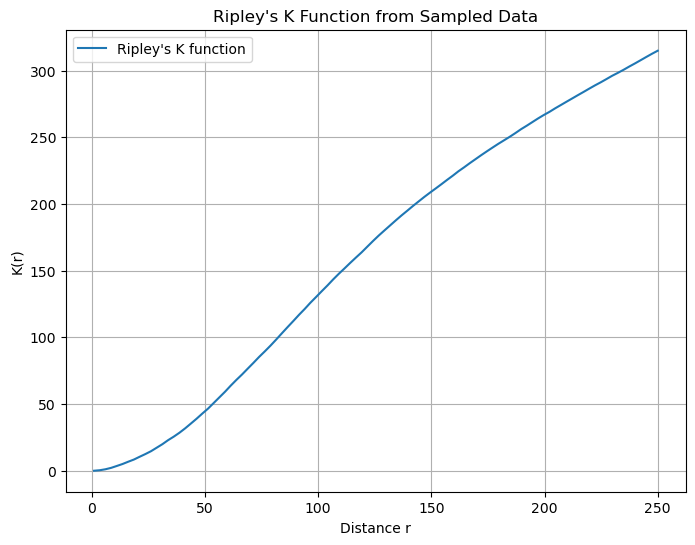

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

# We'll use the 'Position X' and 'Position Y' as the coordinates for Ripley's K function

# Extracting the coordinates
sample_coords = time_400_data[['Position X', 'Position Y']].values

# Define the range of distances for which to calculate Ripley's K function
r_values = np.linspace(1, 250, 100)  # Adjusting the range of distances

# Calculate the distance matrix for the sampled points
dist_matrix = distance_matrix(sample_coords, sample_coords)

# Calculate Ripley's K function
K_values = []

for r in r_values:
    # Count the number of pairs within distance r (excluding self-pairs)
    K_r = np.sum(dist_matrix <= r) - len(sample_coords)
    # Normalize by the number of points and assume unit area
    K_r_normalized = K_r / len(sample_coords)
    K_values.append(K_r_normalized)

# Convert results to numpy array for easier manipulation
K_values = np.array(K_values)

# Plot Ripley's K function
plt.figure(figsize=(8, 6))
plt.plot(r_values, K_values, label="Ripley's K function")
plt.xlabel("Distance r")
plt.ylabel("K(r)")
plt.title("Ripley's K Function from Sampled Data")
plt.legend()
plt.grid(True)
plt.show()


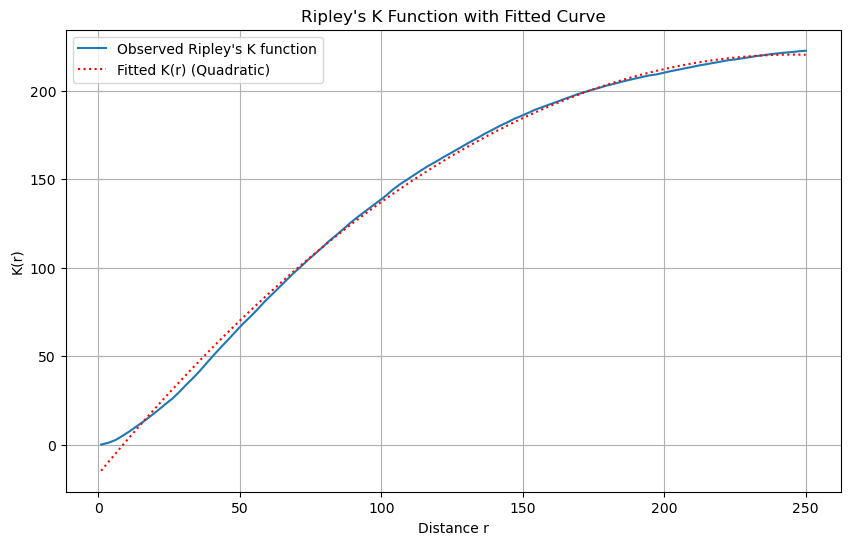

array([-3.93326094e-03,  1.93197654e+00, -1.66914039e+01])

In [14]:

from scipy.optimize import curve_fit

# Define a function to fit the data, a common choice is a quadratic function for simplicity
def quadratic_func(r, a, b, c):
    return a * r**2 + b * r + c

# Fit the observed Ripley's K function data
params, covariance = curve_fit(quadratic_func, r_values, K_values)

# Generate the fitted values
fitted_K_values = quadratic_func(r_values, *params)

# Plot the observed Ripley's K function, the expected πr^2, and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(r_values, K_values, label="Observed Ripley's K function")
plt.plot(r_values, fitted_K_values, label="Fitted K(r) (Quadratic)", linestyle=':', color='red')
plt.xlabel("Distance r")
plt.ylabel("K(r)")
plt.title("Ripley's K Function with Fitted Curve")
plt.legend()
plt.grid(True)
plt.show()

params


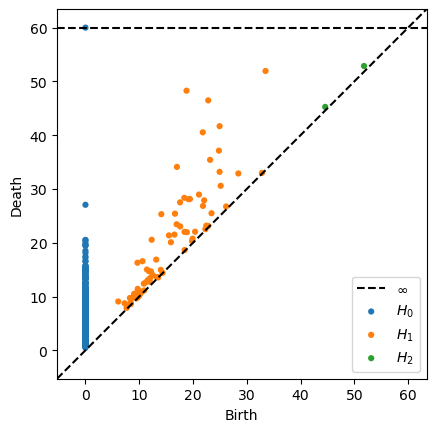

Betti 0: 1
Betti 1: 72
Betti 2: 2


In [19]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams


# Compute the Rips complex and persistent homology
diagrams = ripser(sample_coords, maxdim=2)['dgms']
#print(diagrams)

# Plot the persistence diagrams
plot_diagrams(diagrams, show=True)

# Extract Betti numbers from the diagrams
betti_0 = len([pt for pt in diagrams[0] if pt[1] == np.inf])
betti_1 = len(diagrams[1])
betti_2 = len(diagrams[2])

print(f"Betti 0: {betti_0}")
print(f"Betti 1: {betti_1}")
print(f"Betti 2: {betti_2}")


In [15]:
from ripser import ripser
from persim import plot_diagrams

# Assume 'sample_coords' is your coordinate data
result = ripser(sample_coords, maxdim=2)

# Retrieve persistence diagrams
diagrams = result['dgms']

# For example, to find the radius for the first Betti 1 (loop):
first_loop_birth = diagrams[1][0, 0]
first_loop_death = diagrams[1][0, 1]

print(f"First loop appears at radius: {first_loop_birth}")
print(f"First loop disappears at radius: {first_loop_death}")


First loop appears at radius: 61.10927963256836
First loop disappears at radius: 80.15730285644531


MovieWriter imagemagick unavailable; using Pillow instead.


KeyboardInterrupt: 

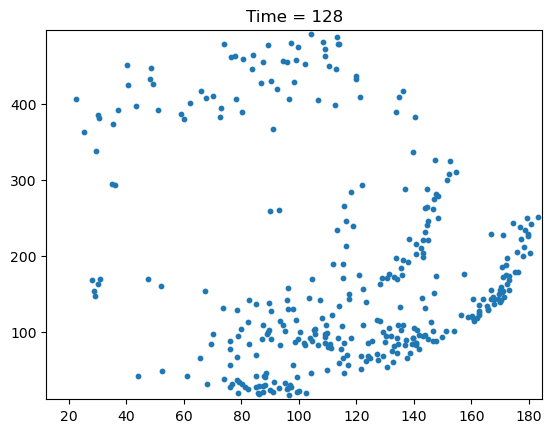

In [9]:

import matplotlib.pyplot as plt
import matplotlib.animation as animation


# Filter data to include only times from 1 to 400
filtered_data = data[(data['Time'] >= 1) & (data['Time'] <= 400)]

# Set up the figure, axis, and plot element
fig, ax = plt.subplots()
scat = ax.scatter([], [], s=10)

# Initialize function for the animation
def init():
    ax.set_xlim(filtered_data['Position X'].min(), filtered_data['Position X'].max())
    ax.set_ylim(filtered_data['Position Y'].min(), filtered_data['Position Y'].max())
    return scat,

# Update function for each frame in the animation
def update(frame):
    current_data = filtered_data[filtered_data['Time'] == frame]
    scat.set_offsets(current_data[['Position X', 'Position Y']].values)
    ax.set_title(f'Time = {frame}')
    return scat,

# Create the animation without blitting
ani = animation.FuncAnimation(fig, update, frames=range(1, 401), init_func=init, blit=False, repeat=False)

# Save or show the animation
ani.save('data_animation.gif', writer='imagemagick', fps=10)  # Saves as a gif file
# ani.save('data_animation.mp4', writer='ffmpeg', fps=10)  # Alternatively, save as mp4 if ffmpeg is installed
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

def compute_ripleys_k(coords, r_values):
    """Computes Ripley's K function for given coordinates and r values."""
    dist_matrix = distance_matrix(coords, coords)
    K_values = []

    for r in r_values:
        K_r = np.sum(dist_matrix <= r) - len(coords)  # Exclude self-pairs
        K_r_normalized = K_r / len(coords)  # Normalize by number of points
        K_values.append(K_r_normalized)

    return np.array(K_values)

def plot_ripleys_k(data, r_values, times):
    """Plots Ripley's K function for specified times."""
    plt.figure(figsize=(10, 6))

    for time in times:
        # Filter the data for the given time
        time_data = data[data['Time'] == time]
        coords = time_data[['Position X', 'Position Y']].values

        # Compute Ripley's K function
        K_values = compute_ripleys_k(coords, r_values)

        # Plot the Ripley's K function
        plt.plot(r_values, K_values, label=f'Time = {time}')

    # Plot the expected K(r) under CSR (πr^2)
    expected_K = np.pi * r_values**2

    # Labels and title
    plt.xlabel("Distance r")
    plt.ylabel("K(r)")
    plt.title("Ripley's K Function at Different Time Points")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Load the dataset


# Define the range of distances
r_values = np.linspace(1, 500, 100)

# Define the times of interest
times_of_interest = [1, 100, 400]

# Plot Ripley's K function for the specified times
plot_ripleys_k(data, r_values, times_of_interest)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser

def compute_betti_1(data, times):
    """Computes Betti 1 number for each time point in the given list of times."""
    betti_1_values = []

    for time in times:
        # Filter the data for the given time
        time_data = data[data['Time'] == time]
        coords = time_data[['Position X', 'Position Y']].values

        # Compute the persistent homology
        diagrams = ripser(coords, maxdim=1)['dgms']

        # Betti 1 is the number of points in the H1 (1D holes) persistence diagram
        betti_1 = len(diagrams[1])  # Count the number of 1D loops (Betti 1)
        betti_1_values.append(betti_1)

    return betti_1_values

def plot_betti_1_over_time(data, start_time, end_time):
    """Plots Betti 1 number over time from start_time to end_time."""
    times = range(start_time, end_time + 1)

    # Compute Betti 1 values over the specified time range
    betti_1_values = compute_betti_1(data, times)

    # Plot the Betti 1 values over time
    plt.figure(figsize=(10, 6))
    plt.plot(times, betti_1_values, marker='o')
    plt.xlabel("Time")
    plt.ylabel("Betti 1 (Number of Loops)")
    plt.title("Betti 1 Number Over Time")
    plt.grid(True)
    plt.show()

# Plot Betti 1 number from time 1 to 400
plot_betti_1_over_time(data, start_time=1, end_time=400)


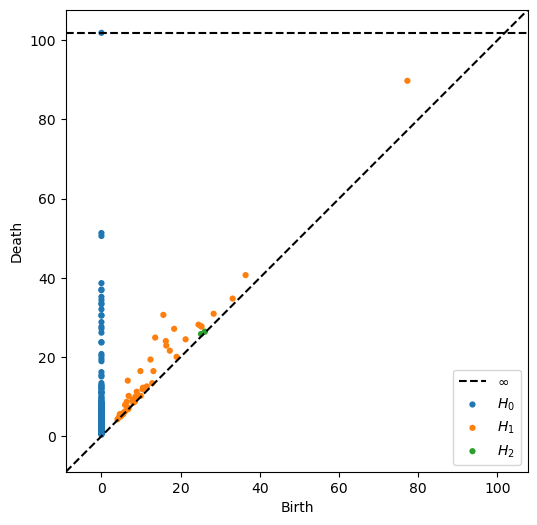

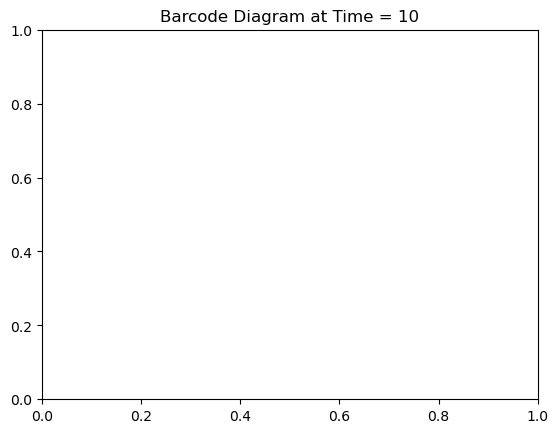

In [8]:

from ripser import ripser
from persim import plot_diagrams

def plot_barcode(data, time):
    """Plots the barcode of the system at a specific time t."""
    # Filter the data for the given time
    time_data = data[data['Time'] == time]
    coords = time_data[['Position X', 'Position Y']].values

    # Compute the persistent homology
    diagrams = ripser(coords, maxdim=2)['dgms']

    # Plot the barcode
    plt.figure(figsize=(10, 6))
    plot_diagrams(diagrams, show=True)
    plt.title(f"Barcode Diagram at Time = {time}")
    plt.show()




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[76.89128876 95.44257355]
 [23.335392   33.28832245]
 [22.58104706 26.93046188]
 [22.53615952 23.34830856]
 [21.80981064 25.10923576]
 [21.76948547 22.78752708]
 [21.26976967 23.1719532 ]
 [19.32120895 21.29200172]
 [18.05298042 18.86765099]
 [17.86654472 26.41648674]
 [17.41931343 20.46709633]
 [15.51153183 16.34807587]
 [14.73157883 27.99110985]
 [14.40068913 17.99827766]
 [13.81131744 14.7269268 ]
 [13.74084091 15.55817318]
 [12.59237194 13.62646389]
 [11.71347809 11.97416592]
 [11.64836311 15.26084614]
 [11.1333704  29.28205681]
 [10.65713692 10.89038467]
 [10.45906162 10.62993908]
 [10.28595448 10.82935524]
 [ 9.66224766 11.0266161 ]
 [ 9.11091805  9.16219044]
 [ 8.34434986  9.06450748]
 [ 8.00410271 12.08025551]
 [ 7.79278135  9.814394  ]
 [ 7.63695812 11.41870594]
 [ 7.46383333  7.64167404]
 [ 7.43228388  8.23641872]
 [ 6.11315012  6.28794384]
 [ 6.08855963  6.46943426]
 [ 5.88210249  8.69856644]
 [ 5.56792831  7.0579834 ]
 [ 5.37273884  5.57050133]
 [ 5.28042936  5.80483913]
 

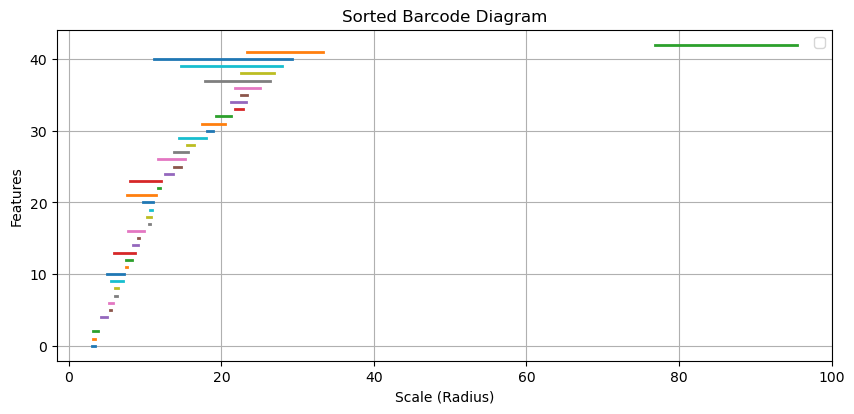

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser

def plot_sorted_barcode(diagrams):
    """Plots the barcode with features sorted by their birth times."""
    # Extract birth and death times for all dimensions (H0, H1, H2, etc.)
    all_bars = []
    for bar in enumerate(diagrams):
        
        
        birth = bar[1][0]
        print(birth)
        death = bar[1][1]
        # Only consider finite death times for barcodes
        if np.isfinite(death):
            all_bars.append((birth, death))
    
    # Sort bars by birth time (second element in tuple)
    all_bars_sorted = sorted(all_bars, key=lambda x: x[1])

    # Print sorted birth and death times
    for i, (birth, death) in enumerate(all_bars_sorted):
        print(f"Feature {i+1}: Birth = {birth:.2f}, Death = {death:.2f}")
    
    # Generate the barcode plot
    plt.figure(figsize=(10, len(all_bars_sorted) / 10))
    for i, (birth, death) in enumerate(all_bars_sorted):
        plt.plot([birth, death], [i, i], lw=2)

    plt.xlabel('Scale (Radius)')
    plt.ylabel('Features')
    plt.title('Sorted Barcode Diagram')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming you've already computed the persistence diagrams using ripser
# Example: diagrams = ripser(coords, maxdim=2)['dgms']

# Generate some sample data (or use your own diagrams)
print(diagrams[1])
# Plot sorted barcode
plot_sorted_barcode(diagrams[1])


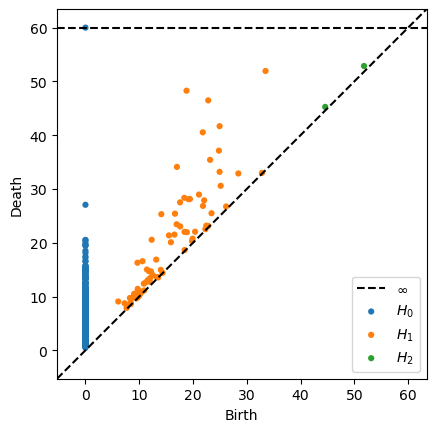

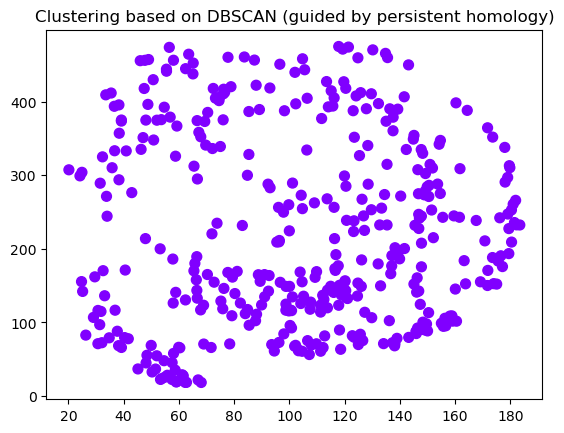

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from sklearn.cluster import DBSCAN

# Generate some sample data (or use your own data)
'''
np.random.seed(0)
data = np.concatenate([
    np.random.normal(loc=[2, 2], scale=0.3, size=(100, 2)),
    np.random.normal(loc=[7, 7], scale=0.3, size=(100, 2)),
    np.random.normal(loc=[2, 7], scale=0.3, size=(100, 2)),
])
'''
# Step 1: Compute persistent homology
diagrams = ripser(sample_coords, maxdim=2)['dgms']

# Step 2: Visualize the persistence diagram for H0 (connected components)
from persim import plot_diagrams
plot_diagrams(diagrams, show=True)

# Step 3: Apply DBSCAN using the appropriate radius (based on persistent homology insight)
dbscan = DBSCAN(eps=5, min_samples=20)

labels = dbscan.fit_predict(sample_coords)

# Step 4: Plot the clustered data
plt.scatter(sample_coords[:, 0], sample_coords[:, 1], c=labels, cmap='rainbow', s=50)
plt.title("Clustering based on DBSCAN (guided by persistent homology)")
plt.show()
